In [79]:
import shap
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [80]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [81]:
data = pd.concat([df1, df2])
df_dropped = data.dropna()
df_reset = df_dropped.reset_index(drop=True)
df_reset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
178,872,1.0,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
179,873,0.0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
180,880,1.0,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
181,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [82]:
# Change from categorical to numerical
label_encoder = LabelEncoder()
df_reset['Sex'] = label_encoder.fit_transform(df_reset['Sex'])
df_reset['Ticket'] = label_encoder.fit_transform(df_reset['Ticket'])
df_reset['Cabin'] = label_encoder.fit_transform(df_reset['Cabin'])
df_reset['Embarked'] = label_encoder.fit_transform(df_reset['Embarked'])

In [83]:
X = df_reset.drop(['Name', 'Embarked'], axis=1)
X

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,2,1.0,1,0,38.0,1,0,109,71.2833,72
1,4,1.0,1,0,35.0,1,0,31,53.1000,48
2,7,0.0,1,1,54.0,0,0,55,51.8625,117
3,11,1.0,3,0,4.0,1,1,120,16.7000,131
4,12,1.0,1,0,58.0,0,0,26,26.5500,43
...,...,...,...,...,...,...,...,...,...,...
178,872,1.0,1,0,47.0,1,1,33,52.5542,91
179,873,0.0,1,1,33.0,0,0,89,5.0000,29
180,880,1.0,1,0,56.0,0,1,38,83.1583,61
181,888,1.0,1,0,19.0,0,0,10,30.0000,25


In [84]:
y = df_reset['Embarked']
y

0      0
1      2
2      2
3      2
4      2
      ..
178    2
179    2
180    0
181    2
182    0
Name: Embarked, Length: 183, dtype: int32

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

ExactExplainer explainer: 93it [00:11,  1.26it/s]                                                                      


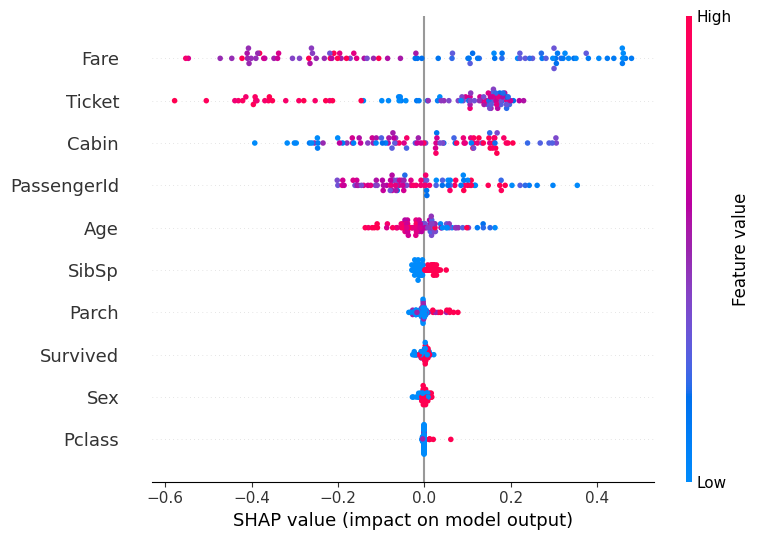

In [87]:
shap.summary_plot(shap_values, X_test)

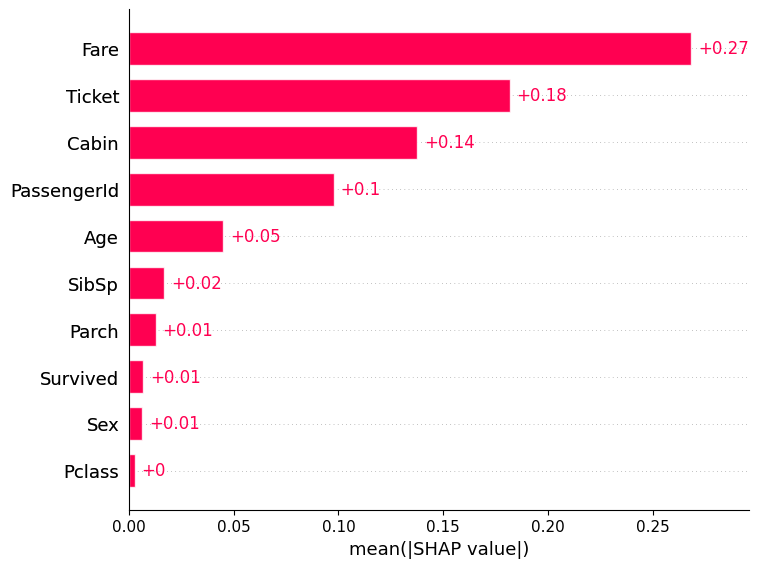

In [88]:
shap.plots.bar(shap_values)

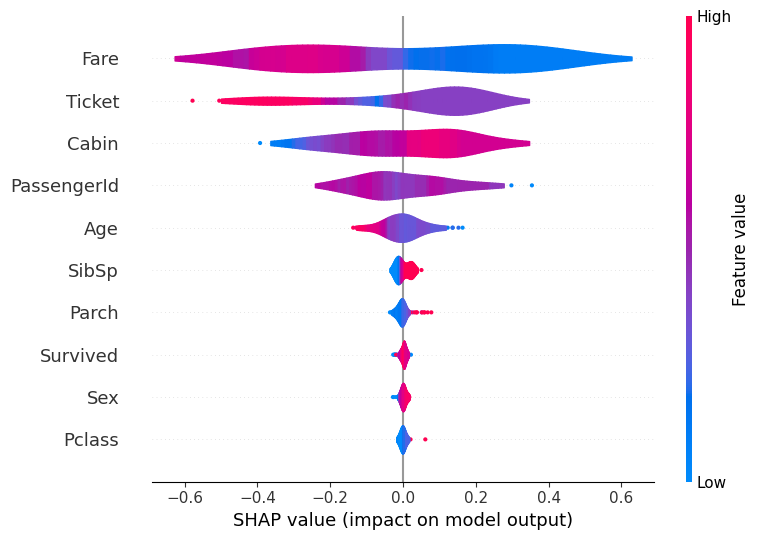

In [89]:
shap.summary_plot(shap_values, plot_type='violin')

5. Select a specific instance (index) from the dataset for interpretation and explain how Shap values help in interpreting the prediction for that instance.
   - SHAP values help us understand how the features help us predict the survival of the passenger in Titanic. For example, in index 0, we can see how the ticket, age, fare, cabin can affect the survivability of a passenger
7. Summarize the significance of Shap values in interpreting machine learning models' predictions, particularly in the context of the Titanic survival predictions.
   - SHAP values highlights the contribution of each value to the passenger's survivability, as well as allowing us to analyze patterns, biases and fairness, which can then be used on future ship builds that prevents a large amount of people dying.